In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stats


In [4]:
# part.1 - implementation of classical conditioning paradigms using Rescola-Wagner rule

'''
constant parameters of all simulations:

1. reward value = 1
2. no reward = 0
3. learning rate = 0.05

'''

reward = 1
no_reward = 0
learningR = 0.05

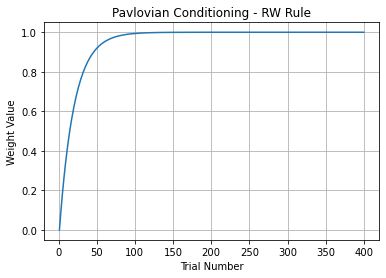

In [5]:
########################## part.1.1 - Pavlovian paradigm

# initialization of parameters

num_trials = 400
w = np.zeros((num_trials,)) # not pre-trained
u = np.ones((num_trials,)) # stimulus available in all trials
r = np.ones((num_trials,)) # reward available in all trials
v = np.zeros((num_trials,))

for i in range (num_trials-1):
    v[i] = w[i]*u[i]
    delta = r[i]-v[i]
    w[i+1] = w[i] + learningR*delta*u[i]
    
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots()
ax.plot(trials,w);
ax.set_xlabel('Trial Number');
ax.set_ylabel('Weight Value');
ax.set_title('Pavlovian Conditioning - RW Rule');
ax.grid(True)
#plt.savefig('1.1.png')

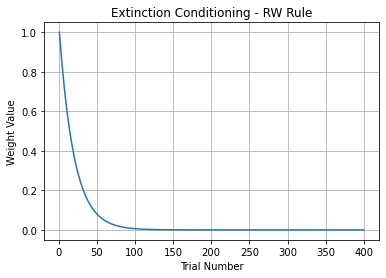

In [6]:
########################## part.1.2 - Extinction paradigm

# initialization of parameters

num_trials = 400
w = np.ones((num_trials,)) # pre-trained with r = 1
u = np.ones((num_trials,)) # stimulus available in all trials
r = np.zeros((num_trials,)) # no reward in all trials
v = np.zeros((num_trials,))

for i in range (num_trials-1):
    v[i] = w[i]*u[i]
    delta = r[i]-v[i]
    w[i+1] = w[i] + learningR*delta*u[i]
    
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots()
ax.plot(trials,w);
ax.set_xlabel('Trial Number');
ax.set_ylabel('Weight Value');
ax.set_title('Extinction Conditioning - RW Rule');
ax.grid(True)
#plt.savefig('1.2.png')

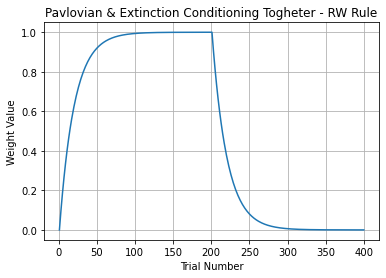

In [7]:
########################## part.1.3 - Pavlovian & Extinction paradigm together

# initialization of parameters

num_trials = 400
w = np.zeros((num_trials,)) # pre-trained with r = 0
u = np.ones((num_trials,)) # stimulus available in all trials
# reward available up to first half trials and then no reward up to the end
r = np.concatenate((np.ones((int(num_trials/2),)),np.zeros((int(num_trials/2),))),axis = 0) 
v = np.zeros((num_trials,))

for i in range (num_trials-1):
    v[i] = w[i]*u[i]
    delta = r[i]-v[i]
    w[i+1] = w[i] + learningR*delta*u[i]
    
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots()
ax.plot(trials,w);
ax.set_xlabel('Trial Number');
ax.set_ylabel('Weight Value');
ax.set_title('Pavlovian & Extinction Conditioning Togheter - RW Rule');
ax.grid(True)
#plt.savefig('1.3.png')

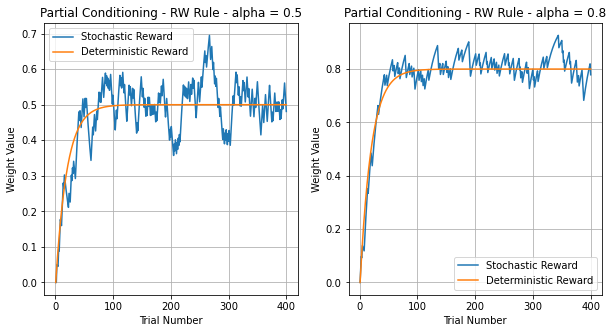

In [8]:
########################## part.1.4 - Partial paradigm

# initialization of parameters

num_trials = 400
alpha = 0.5 # probability of appearing reward
wProb = np.zeros((num_trials,)) # not pre-trained
w = np.zeros((num_trials,)) # not pre-trained
u = np.ones((num_trials,)) # stimulus available in all trials
rProb = np.random.uniform(0, 1, size = num_trials) < alpha
r = alpha*np.ones((num_trials,)) # reward = 0.5 available in all trials
vProb = np.zeros((num_trials,))
v = np.zeros((num_trials,))

for i in range (num_trials-1):
    vProb[i] = wProb[i]*u[i]
    delta = rProb[i]-vProb[i]
    wProb[i+1] = wProb[i] + learningR*delta*u[i]
    v[i] = w[i]*u[i]
    delta = r[i]-v[i]
    w[i+1] = w[i] + learningR*delta*u[i]
    
    
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(trials,wProb);
ax[0].plot(trials,w);
ax[0].set_xlabel('Trial Number');
ax[0].set_ylabel('Weight Value');
ax[0].set_title(f'Partial Conditioning - RW Rule - alpha = {alpha}');
ax[0].grid(True)
ax[0].legend(['Stochastic Reward','Deterministic Reward']);

################################################### with another probability
alpha = 0.8 # probability of appearing reward
wProb = np.zeros((num_trials,)) # not pre-trained
w = np.zeros((num_trials,)) # not pre-trained
u = np.ones((num_trials,)) # stimulus available in all trials
rProb = np.random.uniform(0, 1, size = num_trials) < alpha
r = alpha*np.ones((num_trials,)) # reward = 0.5 available in all trials
vProb = np.zeros((num_trials,))
v = np.zeros((num_trials,))

for i in range (num_trials-1):
    vProb[i] = wProb[i]*u[i]
    delta = rProb[i]-vProb[i]
    wProb[i+1] = wProb[i] + learningR*delta*u[i]
    v[i] = w[i]*u[i]
    delta = r[i]-v[i]
    w[i+1] = w[i] + learningR*delta*u[i]
    
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
ax[1].plot(trials,wProb);
ax[1].plot(trials,w);
ax[1].set_xlabel('Trial Number');
ax[1].set_ylabel('Weight Value');
ax[1].set_title(f'Partial Conditioning - RW Rule - alpha = {alpha}');
ax[1].grid(True)
ax[1].legend(['Stochastic Reward','Deterministic Reward']);
#plt.savefig('1.4.png')

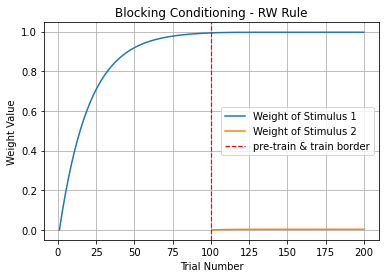

In [9]:
# part.3.1.1 - Blocking paradigm


# initialization of parameters

num_trials = 200
w1 = np.zeros((num_trials,)) # pre-trained
w2 = np.zeros((int(num_trials/2),)) # not pre-trained
u = np.ones((num_trials,)) # stimulus available in all trials
r = np.ones((num_trials,)) # reward available in all trials
v = np.zeros((num_trials,))

for i in range (num_trials-1):
    if (i <= num_trials/2 - 1):
        v[i] = w1[i]*u[i]
        delta = r[i]-v[i]
        w1[i+1] = w1[i] + learningR*delta*u[i]
    else:
        v[i] = w1[i]*u[i] + w2[i-int(num_trials/2)]*u[i]
        delta = r[i]-v[i]
        w1[i+1] = w1[i] + learningR*delta*u[i]
        w2[i+1-int(num_trials/2)] = w2[i-int(num_trials/2)] + learningR*delta*u[i]
    
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
trials2 = np.arange(int(num_trials/2)+1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots()
ax.plot(trials,w1);
ax.plot(trials2,w2);
plt.axvline(x = 100, color = 'r', linewidth = 1.2, linestyle = '--')
ax.set_xlabel('Trial Number');
ax.set_ylabel('Weight Value');
ax.set_title('Blocking Conditioning - RW Rule');
ax.grid(True)
ax.legend(['Weight of Stimulus 1','Weight of Stimulus 2','pre-train & train border']);
#plt.savefig('1.5.png')

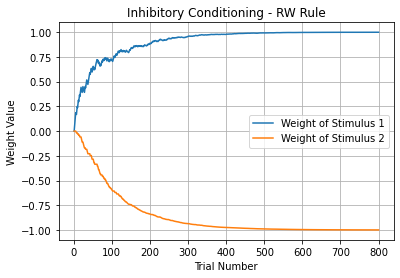

In [10]:
########################## part.1.6 - Inhibitory paradigm

# initialization of parameters

num_trials = 800
w1 = np.zeros((num_trials,)) # not pre-trained
w2 = np.zeros((num_trials,)) # not pre-trained
u = np.ones((num_trials,)) # stimulus available in all trials
r = np.ones((num_trials,)) # reward available in all trials where s1 given
v = np.zeros((num_trials,))
j = 0;
for i in range (num_trials-1):
    state = np.random.uniform(0, 1);
    if(state >= 0.5):
        v[i] = w1[i]*u[i] + w2[i]*u[i]
        delta = 0-v[i]
        w1[i+1] = w1[i] + learningR*delta*u[i]
        w2[i+1] = w2[i] + learningR*delta*u[i]
    else:
        v[i] = w1[i]*u[i]
        delta = r[i]-v[i]
        w1[i+1] = w1[i] + learningR*delta*u[i]
        w2[i+1] = w2[i] + learningR*delta*0
    
    
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots()
ax.plot(trials,w1);
ax.plot(trials,w2);
ax.set_xlabel('Trial Number');
ax.set_ylabel('Weight Value');
ax.set_title('Inhibitory Conditioning - RW Rule');
ax.grid(True)
ax.legend(['Weight of Stimulus 1','Weight of Stimulus 2']);
#plt.savefig('1.6.png')

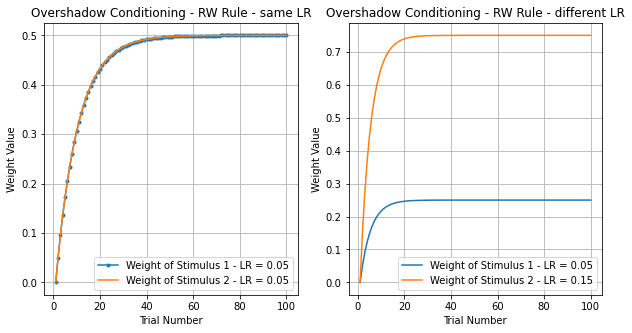

In [20]:
########################## part.1.7 & 2.1 - Overshadow paradigm

# initialization of parameters

num_trials = 100
w1 = np.zeros((num_trials,)) # pre-trained
w2 = np.zeros((num_trials,)) # not pre-trained
u = np.ones((num_trials,)) # stimulus available in all trials
r = np.ones((num_trials,)) # reward available in all trials
v = np.zeros((num_trials,))

for i in range (num_trials-1):
    v[i] = w1[i]*u[i] + w2[i]*u[i]
    delta = r[i]-v[i]
    w1[i+1] = w1[i] + learningR*delta*u[i]
    w2[i+1] = w2[i] + learningR*delta*u[i]
    
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(trials,w1,marker = ".");
ax[0].plot(trials,w2);
ax[0].set_xlabel('Trial Number');
ax[0].set_ylabel('Weight Value');
ax[0].set_title('Overshadow Conditioning - RW Rule - same LR');
ax[0].grid(True)
ax[0].legend(['Weight of Stimulus 1 - LR = 0.05','Weight of Stimulus 2 - LR = 0.05']);



# different learning rates 
w1 = np.zeros((num_trials,)) # pre-trained
w2 = np.zeros((num_trials,)) # not pre-trained
learningR1 = 0.05;
learningR2 = 0.15
u = np.ones((num_trials,)) # stimulus available in all trials
r = np.ones((num_trials,)) # reward available in all trials
v = np.zeros((num_trials,))

for i in range (num_trials-1):
    v[i] = w1[i]*u[i] + w2[i]*u[i]
    delta = r[i]-v[i]
    w1[i+1] = w1[i] + learningR1*delta*u[i]
    w2[i+1] = w2[i] + learningR2*delta*u[i]
    
# plot weight through trials
ax[1].plot(trials,w1);
ax[1].plot(trials,w2);
ax[1].set_xlabel('Trial Number');
ax[1].set_ylabel('Weight Value');
ax[1].set_title('Overshadow Conditioning - RW Rule - different LR');
ax[1].grid(True)
ax[1].legend(['Weight of Stimulus 1 - LR = 0.05','Weight of Stimulus 2 - LR = 0.15']);
#plt.savefig('1.7.png')

In [ ]:
# part.3 - Implementation of Kalman Filter

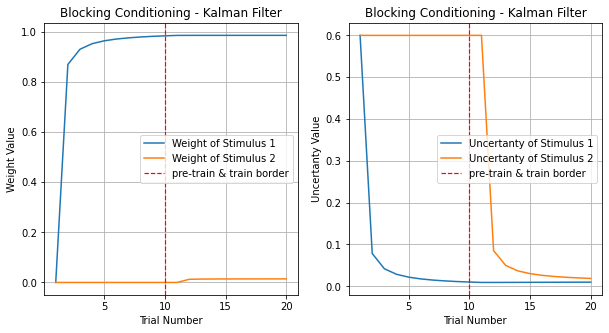

In [28]:
# part.3.1.1 - Blocking paradigm


# initialization of parameters

num_trials = 20
w1 = np.zeros((num_trials,)) 
w2 = np.zeros((num_trials,)) 
sigma1 = 0.6 # intial value
sigma2 = 0.6 # initial value
u1 = np.ones((num_trials,)) # stimulus1 available in all trials
u2 = np.concatenate((np.zeros((int(num_trials/2),)),np.ones((int(num_trials/2),))),axis = 0) # stimulus available in second half trials
r = np.ones((num_trials,)) # reward available in all trials
v = np.zeros((num_trials,)) # output

# convariance matrix intialization
covarianceMat = np.zeros((2,2,num_trials));
covarianceMat[:,:,0] = [[sigma1, 0], [0, sigma2]]
tau = 0.3

for i in range (num_trials-1):
        mean, sigma = 0, 0.01 # mean and standard deviation
        v[i] = w1[i]*u1[i] + w2[i]*u2[i]
        deltaW = (np.matmul(covarianceMat[:,:,i],[[u1[i]],[u2[i]]])\
                  /(np.matmul(np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]),[[u1[i]],[u2[i]]]) + tau**2)) * (r[i]-v[i]);
        w1[i+1] = w1[i] + deltaW[0];
        w2[i+1] = w2[i] + deltaW[1];
        if(i <= num_trials/2-1):
            covarianceMat[0,0,i] = covarianceMat[0,0,i] + sigma**2
        else:
            covarianceMat[:,:,i] = covarianceMat[:,:,i] + sigma**2
        deltaCovMat = np.matmul((np.matmul(covarianceMat[:,:,i],[[u1[i]],[u2[i]]])\
        /(np.matmul(np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]),[[u1[i]],[u2[i]]]) + tau**2))\
                                ,np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]))
        covarianceMat[:,:,i+1] = covarianceMat[:,:,i] - deltaCovMat
        
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(trials,w1);
ax[0].plot(trials,w2);
ax[0].axvline(x = num_trials/2, color = 'r', linewidth = 1.2, linestyle = '--')
ax[0].set_xlabel('Trial Number');
ax[0].set_ylabel('Weight Value');
ax[0].set_title('Blocking Conditioning - Kalman Filter');
ax[0].grid(True)
ax[0].legend(['Weight of Stimulus 1','Weight of Stimulus 2','pre-train & train border']);

# plot variances through trials
ax[1].plot(trials,covarianceMat[0,0,:]);
ax[1].plot(trials,covarianceMat[1,1,:]);
ax[1].axvline(x = num_trials/2, color = 'r', linewidth = 1.2, linestyle = '--')
ax[1].set_xlabel('Trial Number');
ax[1].set_ylabel('Uncertanty Value');
ax[1].set_title('Blocking Conditioning - Kalman Filter');
ax[1].grid(True)
ax[1].legend(['Uncertanty of Stimulus 1','Uncertanty of Stimulus 2','pre-train & train border']);
#plt.savefig('2.1.png')


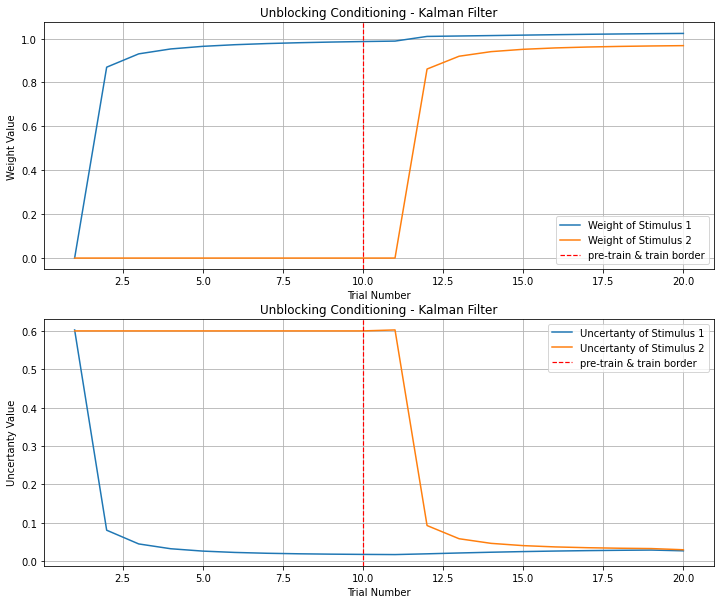

In [33]:
# part.3.1.2 - Unblocking paradigm


# initialization of parameters

num_trials = 20
w1 = np.zeros((num_trials,)) 
w2 = np.zeros((num_trials,)) 
sigma1 = 0.6 # intial value
sigma2 = 0.6 # initial value
u1 = np.ones((num_trials,)) # stimulus1 available in all trials
u2 = np.concatenate((np.zeros((int(num_trials/2),)),np.ones((int(num_trials/2),))),axis = 0) # stimulus available in second half trials
r = np.concatenate((np.ones((int(num_trials/2),)),2*np.ones((int(num_trials/2),))),axis = 0) # reward available in all trials
v = np.zeros((num_trials,)) # output

# convariance matrix intialization
covarianceMat = np.zeros((2,2,num_trials));
covarianceMat[:,:,0] = [[sigma1, 0], [0, sigma2]]
tau = 0.3

for i in range (num_trials-1):
        mean, sigma = 0, 0.05# mean and standard deviation
        v[i] = w1[i]*u1[i] + w2[i]*u2[i]
        deltaW = (np.matmul(covarianceMat[:,:,i],[[u1[i]],[u2[i]]])\
                  /(np.matmul(np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]),[[u1[i]],[u2[i]]]) + tau**2)) * (r[i]-v[i]);
        w1[i+1] = w1[i] + deltaW[0];
        w2[i+1] = w2[i] + deltaW[1];
        if(i <= num_trials/2-1):
            covarianceMat[0,0,i] = covarianceMat[0,0,i] + sigma**2
        else:
            covarianceMat[:,:,i] = covarianceMat[:,:,i] + sigma**2
        deltaCovMat = np.matmul((np.matmul(covarianceMat[:,:,i],[[u1[i]],[u2[i]]])\
        /(np.matmul(np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]),[[u1[i]],[u2[i]]]) + tau**2))\
                                ,np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]))
        covarianceMat[:,:,i+1] = covarianceMat[:,:,i] - deltaCovMat
        
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots(2,1,figsize=(12,10))
ax[0].plot(trials,w1)
ax[0].plot(trials,w2)
ax[0].axvline(x = num_trials/2, color = 'r', linewidth = 1.2, linestyle = '--')
ax[0].set_xlabel('Trial Number');
ax[0].set_ylabel('Weight Value');
ax[0].set_title('Unblocking Conditioning - Kalman Filter');
ax[0].grid(True)
ax[0].legend(['Weight of Stimulus 1','Weight of Stimulus 2','pre-train & train border']);

# plot variances through trials
ax[1].plot(trials,covarianceMat[0,0,:]);
ax[1].plot(trials,covarianceMat[1,1,:]);
ax[1].axvline(x = num_trials/2, color = 'r', linewidth = 1.2, linestyle = '--')
ax[1].set_xlabel('Trial Number');
ax[1].set_ylabel('Uncertanty Value');
ax[1].set_title('Unblocking Conditioning - Kalman Filter');
ax[1].grid(True)
ax[1].legend(['Uncertanty of Stimulus 1','Uncertanty of Stimulus 2','pre-train & train border']);

#plt.savefig('2.2.png')

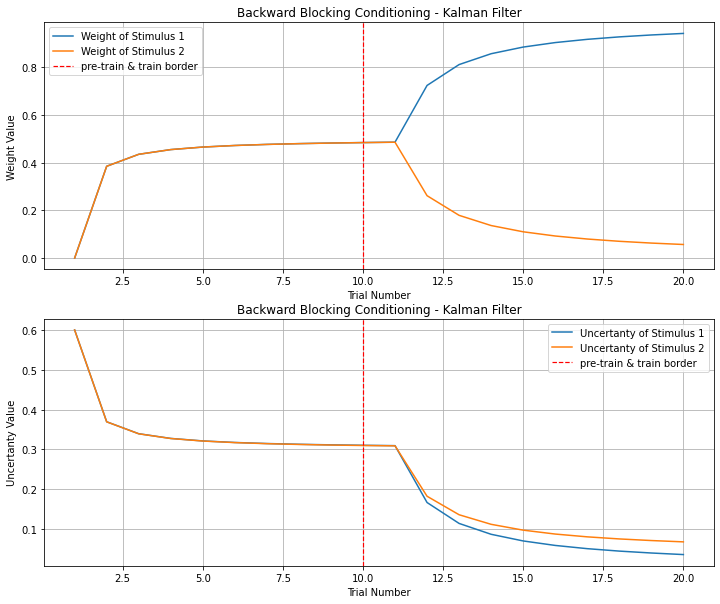

In [3]:
# part.3.1.3 - Backward Blocking paradigm


# initialization of parameters

num_trials = 20
w1 = np.zeros((num_trials,)) 
w2 = np.zeros((num_trials,)) 
sigma1 = 0.6 # intial value
sigma2 = 0.6 # initial value
u1 = np.ones((num_trials,)) # stimulus1 available in all trials
u2 = np.concatenate((np.ones((int(num_trials/2),)),np.zeros((int(num_trials/2),))),axis = 0) # stimulus available in second half trials
r = np.concatenate((np.ones((int(num_trials/2),)),np.ones((int(num_trials/2),))),axis = 0) # reward available in all trials
v = np.zeros((num_trials,)) # output

# convariance matrix intialization
covarianceMat = np.zeros((2,2,num_trials));
covarianceMat[:,:,0] = [[sigma1, 0], [0, sigma2]]
tau = 0.6

for i in range (num_trials-1):
        mean, sigma = 0, 0.01# mean and standard deviation
        v[i] = w1[i]*u1[i] + w2[i]*u2[i]
        deltaW = (np.matmul(covarianceMat[:,:,i],[[u1[i]],[u2[i]]])\
                  /(np.matmul(np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]),[[u1[i]],[u2[i]]]) + tau**2)) * (r[i]-v[i]);
        w1[i+1] = w1[i] + deltaW[0];
        w2[i+1] = w2[i] + deltaW[1];
        if(i <= num_trials/2-1):
            covarianceMat[0,0,i] = covarianceMat[0,0,i] + sigma**2
        else:
            covarianceMat[:,:,i] = covarianceMat[:,:,i] + sigma**2
        deltaCovMat = np.matmul((np.matmul(covarianceMat[:,:,i],[[u1[i]],[u2[i]]])\
        /(np.matmul(np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]),[[u1[i]],[u2[i]]]) + tau**2))\
                                ,np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]))
        covarianceMat[:,:,i+1] = covarianceMat[:,:,i] - deltaCovMat
        
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots(2,1,figsize=(12,10))
ax[0].plot(trials,w1)
ax[0].plot(trials,w2)
ax[0].axvline(x = num_trials/2, color = 'r', linewidth = 1.2, linestyle = '--')
ax[0].set_xlabel('Trial Number');
ax[0].set_ylabel('Weight Value');
ax[0].set_title('Backward Blocking Conditioning - Kalman Filter');
ax[0].grid(True)
ax[0].legend(['Weight of Stimulus 1','Weight of Stimulus 2','pre-train & train border']);

# plot variances through trials
ax[1].plot(trials,covarianceMat[0,0,:]);
ax[1].plot(trials,covarianceMat[1,1,:]);
ax[1].axvline(x = num_trials/2, color = 'r', linewidth = 1.2, linestyle = '--')
ax[1].set_xlabel('Trial Number');
ax[1].set_ylabel('Uncertanty Value');
ax[1].set_title('Backward Blocking Conditioning - Kalman Filter');
ax[1].grid(True)
ax[1].legend(['Uncertanty of Stimulus 1','Uncertanty of Stimulus 2','pre-train & train border']);

plt.savefig('2.2.9.png')

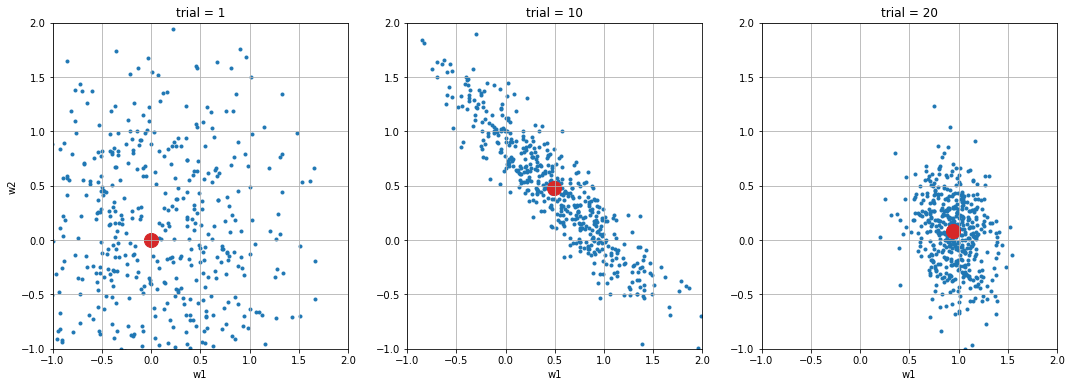

In [20]:
# part.3.1.3 - Backward Blocking paradigm contour plots


# initialization of parameters

num_trials = 20
w1 = np.zeros((num_trials,)) 
w2 = np.zeros((num_trials,)) 
sigma1 = 0.6 # intial value
sigma2 = 0.6 # initial value
u1 = np.ones((num_trials,)) # stimulus1 available in all trials
u2 = np.concatenate((np.ones((int(num_trials/2),)),np.zeros((int(num_trials/2),))),axis = 0) # stimulus available in second half trials
r = np.concatenate((np.ones((int(num_trials/2),)),np.ones((int(num_trials/2),))),axis = 0) # reward available in all trials
v = np.zeros((num_trials,)) # output

# convariance matrix intialization
covarianceMat = np.zeros((2,2,num_trials));
covarianceMat[:,:,0] = [[sigma1, 0], [0, sigma2]]
tau = 0.6

for i in range (num_trials-1):
    mean, sigma = 0, 0.05# mean and standard deviation
    v[i] = w1[i]*u1[i] + w2[i]*u2[i]
    deltaW = (np.matmul(covarianceMat[:,:,i],[[u1[i]],[u2[i]]])\
              /(np.matmul(np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]),[[u1[i]],[u2[i]]]) + tau**2)) * (r[i]-v[i]);
    w1[i+1] = w1[i] + deltaW[0];
    w2[i+1] = w2[i] + deltaW[1];
    if(i <= num_trials/2-1):
        covarianceMat[0,0,i] = covarianceMat[0,0,i] + sigma**2
    else:
        covarianceMat[:,:,i] = covarianceMat[:,:,i] + sigma**2
    deltaCovMat = np.matmul((np.matmul(covarianceMat[:,:,i],[[u1[i]],[u2[i]]])\
    /(np.matmul(np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]),[[u1[i]],[u2[i]]]) + tau**2))\
                            ,np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]))
    covarianceMat[:,:,i+1] = covarianceMat[:,:,i] - deltaCovMat
        
        

    
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots(1,3,figsize=(18,6))
selectTrial = 0
means = [w1[selectTrial], w2[selectTrial]]
x, y = np.random.multivariate_normal(means, covarianceMat[:,:,selectTrial], 500).T 
ax[0].scatter(x, y, marker = '.')
ax[0].scatter(w1[selectTrial],w2[selectTrial], s = 200, c = '#d62728')
ax[0].set_xlabel('w1');
ax[0].set_ylabel('w2');
ax[0].set_title('trial = {}'.format(selectTrial+1));
ax[0].grid(True)
ax[0].set_xlim([-1,2]);
ax[0].set_ylim([-1,2]);

selectTrial = 9
means = [w1[selectTrial], w2[selectTrial]]
x, y = np.random.multivariate_normal(means, covarianceMat[:,:,selectTrial], 500).T
ax[1].scatter(x,y,marker = '.')
ax[1].scatter(w1[selectTrial],w2[selectTrial], s = 200, c = '#d62728')
ax[1].set_xlabel('w1');
ax[1].set_title('trial = {}'.format(selectTrial+1));
ax[1].grid(True)
ax[1].set_xlim([-1,2]);
ax[1].set_ylim([-1,2]);

selectTrial = 19
means = [w1[selectTrial], w2[selectTrial]]
x, y = np.random.multivariate_normal(means, covarianceMat[:,:,selectTrial], 500).T
ax[2].scatter(x,y,marker = '.')
ax[2].scatter(w1[selectTrial],w2[selectTrial], s = 200, c = '#d62728')
ax[2].set_xlabel('w1');
ax[2].set_title('trial = {}'.format(selectTrial+1));
ax[2].grid(True)
ax[2].set_xlim([-1,2]);
ax[2].set_ylim([-1,2]);
plt.savefig('2.4.png')

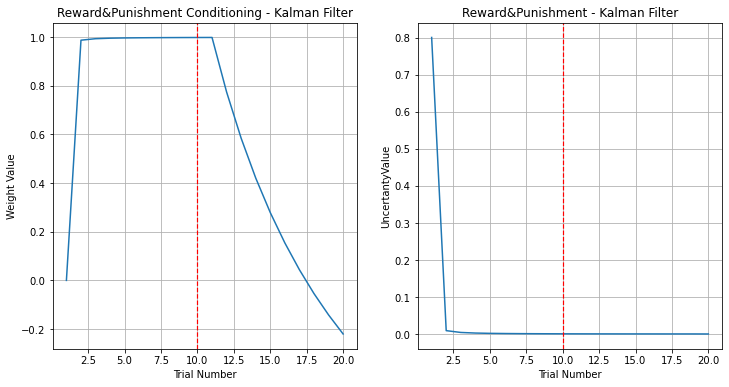

In [21]:
# part.3.1.5 - punishment paradigm


# initialization of parameters

num_trials = 20
w1 = np.zeros((num_trials,)) 
w2 = np.zeros((num_trials,)) 
sigma1 = 0.8 # intial value
sigma2 = 0 # initial value - zero - just one stimuli we have
u1 = np.ones((num_trials,)) # stimulus1 available in all trials
u2 = np.zeros((num_trials,)) # stimulus2 not available in all trials - zero - just one stimuli we have
r = np.concatenate((np.ones((int(num_trials/2),)),-1*np.ones((int(num_trials/2),))),axis = 0) # reward available in all trials
v = np.zeros((num_trials,)) # output

# convariance matrix intialization
covarianceMat = np.zeros((2,2,num_trials));
covarianceMat[:,:,0] = [[sigma1, 0], [0, sigma2]]
tau = 0.1

for i in range (num_trials-1):
        mean, sigma = 0, 0.01 # mean and standard deviation of process noise
        v[i] = w1[i]*u1[i] + w2[i]*u2[i] 
        deltaW = (np.matmul(covarianceMat[:,:,i],[[u1[i]],[u2[i]]])\
                  /(np.matmul(np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]),[[u1[i]],[u2[i]]]) + tau**2)) * (r[i]-v[i]);
        w1[i+1] = w1[i] + deltaW[0];
        w2[i+1] = w2[i] + deltaW[1];
        if(i <= num_trials/2-1):
            covarianceMat[0,0,i] = covarianceMat[0,0,i] + sigma**2
        else:
            covarianceMat[:,:,i] = covarianceMat[:,:,i] + sigma**2
        deltaCovMat = np.matmul((np.matmul(covarianceMat[:,:,i],[[u1[i]],[u2[i]]])\
        /(np.matmul(np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]),[[u1[i]],[u2[i]]]) + tau**2))\
                                ,np.matmul([[u1[i],u2[i]]],covarianceMat[:,:,i]))
        covarianceMat[:,:,i+1] = covarianceMat[:,:,i] - deltaCovMat
        
# plot weight through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(trials,w1);
ax[0].axvline(x = num_trials/2, color = 'r', linewidth = 1.2, linestyle = '--')
ax[0].set_xlabel('Trial Number');
ax[0].set_ylabel('Weight Value');
ax[0].set_title('Reward&Punishment Conditioning - Kalman Filter');
ax[0].grid(True)

# plot variances through trials
ax[1].plot(trials,covarianceMat[0,0,:]);
ax[1].axvline(x = num_trials/2, color = 'r', linewidth = 1.2, linestyle = '--')
ax[1].set_xlabel('Trial Number');
ax[1].set_ylabel('UncertantyValue');
ax[1].set_title('Reward&Punishment - Kalman Filter');
ax[1].grid(True)


plt.savefig('2.5.png')

46.47583756903459


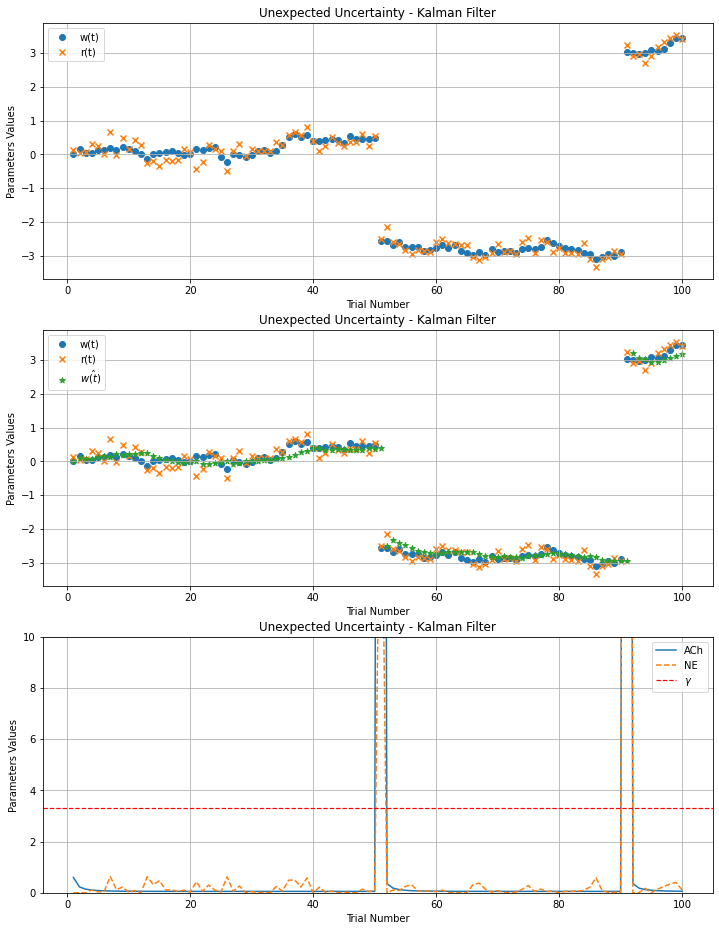

In [9]:
## part.3.1.6 - unexpected uncertainty


# initialization of parameters

num_trials = 100
w1hat = np.zeros((num_trials,)) 
w1 = np.zeros((num_trials,)) 
sigma1 = 0.6 # intial value
r = np.zeros((num_trials,)) 
tau = 0.2 # intial value
mean = 0;
u1 = np.ones((num_trials,)) # stimulus1 available in all trials
v = np.zeros((num_trials,)) # output

# convariance matrix intialization
covarianceMat = np.zeros((num_trials,));
covarianceMat[0] = sigma1

tau = 0.2 # measurement noise std
mean, sigma = 0, 0.1 # mean and standard deviation

w1noise = np.random.normal(mean, sigma, num_trials)
rNoise = np.random.normal(mean, tau, num_trials)
r[0] =  w1[0]*u1[0] + rNoise[0]

# process noise
for i in range (1,num_trials):
    if(i<=49):
        w1[i] = w1[i-1] + w1noise[i-1]
        r[i] = w1[i]*u1[i] + rNoise[i]
    elif(i>=50 and i<=89):
        if(i==50):
            w1[i] = w1[i-1] + w1noise[i-1] - 3
        else:
            w1[i] = w1[i-1] + w1noise[i-1]
        r[i] = w1[i]*u1[i] + rNoise[i]
    else:
        if(i==90):
            w1[i] = w1[i-1] + w1noise[i-1] + 6
        else:
            w1[i] = w1[i-1] + w1noise[i-1]
        r[i] = w1[i]*u1[i] + rNoise[i]

# threshold
betha_thresh = 3.3
Betha = np.zeros((num_trials,)) 

tau, sigma = 0.6, 0.01 # measurement and process noise std


MSE = 0

for i in range (1,num_trials):
    covarianceMatPrev = covarianceMat[i-1] + sigma
    deltaCovMat = covarianceMatPrev*u1[i-1]/(u1[i-1]*covarianceMatPrev*u1[i-1] + tau**2)*u1[i-1]*covarianceMatPrev
    covarianceMat[i] = covarianceMatPrev - deltaCovMat
    
    v[i-1] = w1hat[i-1]*u1[i-1]
    deltaW = (covarianceMatPrev*u1[i-1]/(u1[i-1]*covarianceMatPrev*u1[i-1] + tau**2)) * (r[i-1]-v[i-1])
    w1hat[i] = w1hat[i-1] + deltaW
    
    Betha[i] = ((r[i] - (w1hat[i]*u1[i]))**2)/(u1[i]*covarianceMatPrev*u1[i] + tau**2)
    if(Betha[i] >= betha_thresh):
        covarianceMat[i] = covarianceMat[i] + 100
    MSE = MSE + (w1[i-1] - w1hat[i-1])**2
        
print(MSE)
    
    
        
# plot weight and reward through trials
trials = np.arange(1,num_trials+1) # xlabel - trial number
fig, ax = plt.subplots(3,1,figsize=(12,16))


ax[0].scatter(trials,w1);
ax[0].set_xlabel('Trial Number');
ax[0].set_ylabel('Parameters Values');
ax[0].set_title('Unexpected Uncertainty - Kalman Filter');
ax[0].grid(True)

ax[0].scatter(trials,r,marker = "x");
ax[0].set_xlabel('Trial Number');
ax[0].set_ylabel('Parameters Values');
ax[0].set_title('Unexpected Uncertainty - Kalman Filter');
ax[0].grid(True)

ax[0].legend(['w(t)','r(t)']);


# plot weight and reward and estimated weight through trials 
ax[1].scatter(trials,w1);
ax[1].set_xlabel('Trial Number');
ax[1].set_ylabel('Parameters Values');
ax[1].set_title('Unexpected Uncertainty - Kalman Filter');
ax[1].grid(True)

ax[1].scatter(trials,r,marker = "x");
ax[1].set_xlabel('Trial Number');
ax[1].set_ylabel('Parameters Values');
ax[1].set_title('Unexpected Uncertainty - Kalman Filter');
ax[1].grid(True)

ax[1].scatter(trials,w1hat,marker = "*");
ax[1].set_xlabel('Trial Number');
ax[1].set_ylabel('Parameters Values');
ax[1].set_title('Unexpected Uncertainty - Kalman Filter');
ax[1].grid(True)


ax[1].legend(['w(t)','r(t)','$\hat{w(t)}$']);


# plot uncertainties
ax[2].plot(trials,covarianceMat);
ax[2].set_xlabel('Trial Number');
ax[2].set_ylabel('Parameters Values');
ax[2].set_title('Unexpected Uncertainty - Kalman Filter');
ax[2].grid(True)


ax[2].plot(trials,Betha,'--');
ax[2].set_xlabel('Trial Number');
ax[2].set_ylabel('Parameters Values');
ax[2].set_title('Unexpected Uncertainty - Kalman Filter');
ax[2].grid(True)


ax[2].axhline(y = betha_thresh, color = 'r', linewidth = 1.2, linestyle = '--')
ax[2].set_xlabel('Trial Number');
ax[2].set_ylabel('Parameters Values');
ax[2].set_title('Unexpected Uncertainty - Kalman Filter');
ax[2].grid(True)

ax[2].legend(['ACh','NE','$\gamma$']);
plt.ylim([0,10]);

plt.savefig('3.1.png')

In [14]:
# part.3.1.6.2 - unexpected uncertainty - MSE vs Betha threshold


# initialization of parameters

# threshold
num_trials = 100
betha_thresh = np.linspace(0.0, 30, num = 60)
MSE = np.zeros((betha_thresh.size,num_trials,1000))
sigma1 = 0.6 # intial value



for k in range(1000):
    print(k,end=" ")
    for j in range(betha_thresh.size):
        w1hat = np.zeros((num_trials,)) 
        w1 = np.zeros((num_trials,)) 
        r = np.zeros((num_trials,)) 
        tau = 0.6 # measurement noise std
        mean, sigma = 0, 0.1 # mean and standard deviation

        u1 = np.ones((num_trials,)) # stimulus1 available in all trials
        v = np.zeros((num_trials,)) # output

        # convariance matrix intialization
        covarianceMat = np.zeros((num_trials,));
        covarianceMat[0] = sigma1

        w1noise = np.random.normal(mean, sigma, num_trials)
        rNoise = np.random.normal(mean, tau, num_trials)
        r[0] =  w1[0]*u1[0] + rNoise[0]

        Betha = np.zeros((num_trials,))

        # process noise
        for i in range (1,num_trials):
            if(i<=49):
                w1[i] = w1[i-1] + w1noise[i-1]
                r[i] = w1[i]*u1[i] + rNoise[i]
            elif(i>=50 and i<=89):
                if(i==50):
                    w1[i] = w1[i-1] + w1noise[i-1] - 3
                else:
                    w1[i] = w1[i-1] + w1noise[i-1]
                r[i] = w1[i]*u1[i] + rNoise[i]
            else:
                if(i==90):
                    w1[i] = w1[i-1] + w1noise[i-1] + 6
                else:
                    w1[i] = w1[i-1] + w1noise[i-1]
                r[i] = w1[i]*u1[i] + rNoise[i]


        tau, sigma = 0.6, 0.001 # measurement and process noise std

        for i in range (1,num_trials):
            covarianceMatPrev = covarianceMat[i-1] + sigma
            deltaCovMat = covarianceMatPrev*u1[i-1]/(u1[i-1]*covarianceMatPrev*u1[i-1] + tau**2)*u1[i-1]*covarianceMatPrev
            covarianceMat[i] = covarianceMat[i-1] - deltaCovMat

            v[i-1] = w1hat[i-1]*u1[i-1]
            deltaW = (covarianceMatPrev*u1[i-1]/(u1[i-1]*covarianceMatPrev*u1[i-1] + tau**2)) * (r[i-1]-v[i-1])
            w1hat[i] = w1hat[i-1] + deltaW

            Betha[i] = ((r[i] - (w1hat[i]*u1[i]))**2)/(u1[i]*covarianceMatPrev*u1[i] + tau**2)
            if(Betha[i] >= betha_thresh[j]):
                covarianceMat[i] = covarianceMat[i] + 100
            MSE[j,i,k] = (w1[i] - w1hat[i])**2
                    

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

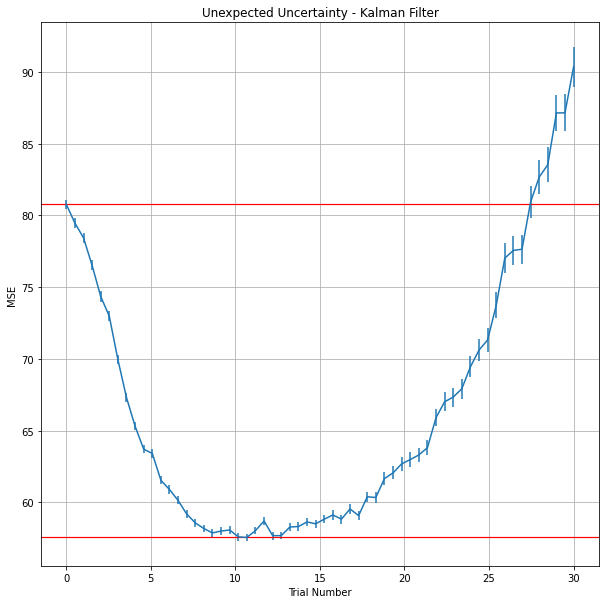

In [16]:
# plot MSEs

fig, ax = plt.subplots(1,1,figsize=(10,10));


ax.errorbar(betha_thresh,np.sum(np.mean(MSE,axis=2),axis = 1),np.std(np.sum(MSE,axis = 1),axis = 1)/math.sqrt(1000));
ax.set_xlabel('Trial Number');
ax.set_ylabel('MSE');
ax.set_title('Unexpected Uncertainty - Kalman Filter');
ax.grid(True)

ax.axhline(y = min(np.sum(np.mean(MSE,axis=2),axis = 1)), color = 'r', linewidth = 1.2)
ax.axhline(y = (np.sum(np.mean(MSE,axis=2),axis = 1))[0], color = 'r', linewidth = 1.2)


plt.savefig('3.2.png')